# Colour - HDRI - Examples: Absolute Luminance Calibration & Photometric Exposure Conversion

Through this example, a [HDR image courtesy of Unity Technologies](https://blog.selfshadow.com/publications/s2016-shading-course/unity/supplemental/index.html) will be calibrated for absolute *Luminance* using the method described in Lagarde (2016) and, then, subsequently converted to photometric exposure in $lx.s$.

In [1]:
from __future__ import division

import os

import colour
from colour.plotting import *

from colour_hdri import (
    EXAMPLES_RESOURCES_DIRECTORY,
    absolute_luminance_calibration_Lagarde2016,
    exposure_value_100,
    photometric_exposure_scale_factor_Lagarde2014,
    saturation_based_speed_focal_plane_exposure,
    upper_hemisphere_illuminance_weights_Lagarde2016)

RESOURCES_DIRECTORY = os.path.join(EXAMPLES_RESOURCES_DIRECTORY,
                                   'unity_001')

colour.utilities.filter_warnings()

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.7.4 (default, Sep  7 2019, 18:27:02)                       *
*                [Clang 10.0.1 (clang-1001.0.46.4)]                           *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.3.14                                                       *
*       colour-hdri : v0.1.5-87-gdad71f7                                      *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.6.1                                                       *
*       matplotlib : 3.0.3                                                    *
*       numpy : 1.17.3                  

In [2]:
colour_style();

## Absolute Luminance Calibration

The *Treasure Island 1* HDR image [description](https://blog.selfshadow.com/publications/s2016-shading-course/unity/supplemental/index.html) is given here:

```
HDRI name: Treasure Island 1
Location: Treasure Island - San Francisco
Date: 13/03/2016
Time: 10h15
Weather: Some clouds

Range:

Standard capture: 
- 9 shots by view
- 8 EV (1/4000 - 1/15")

ND Filter capture: 
- 15 shots by view
- ND Filter: 1000 + 32 (-15 stops)
- 14 EV (1/2000 - 8")  (HDRI shot a bit before new table provided in the document.
                        We have shot up to 8 shutter speeds with ND Filter.)

Total range: 23 EV

Setting Camera:
EV Step: 1
F/8
ISO 100
Lux: 51000
Luminance on 60 % white patch: 6700
```

The value of interest to perform the absolute luminance calibration is the metered illuminance: $51000lx$, it is commonly obtained by measuring illuminance of the upper hemisphere with a light meter.

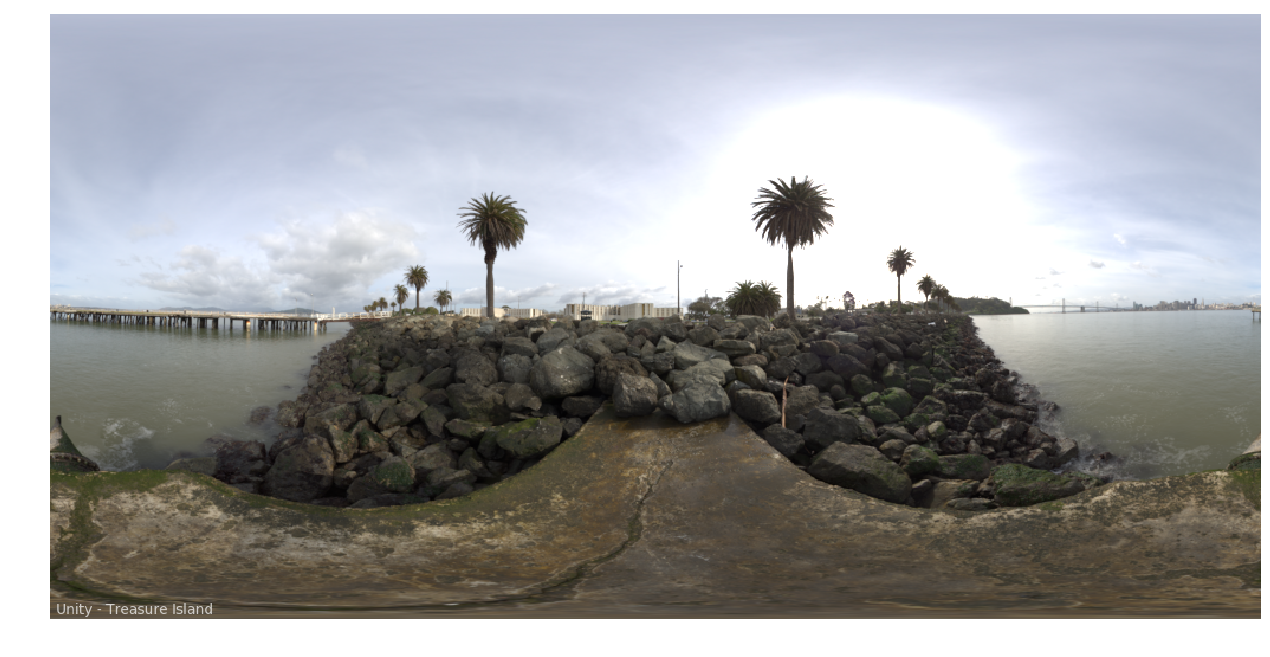

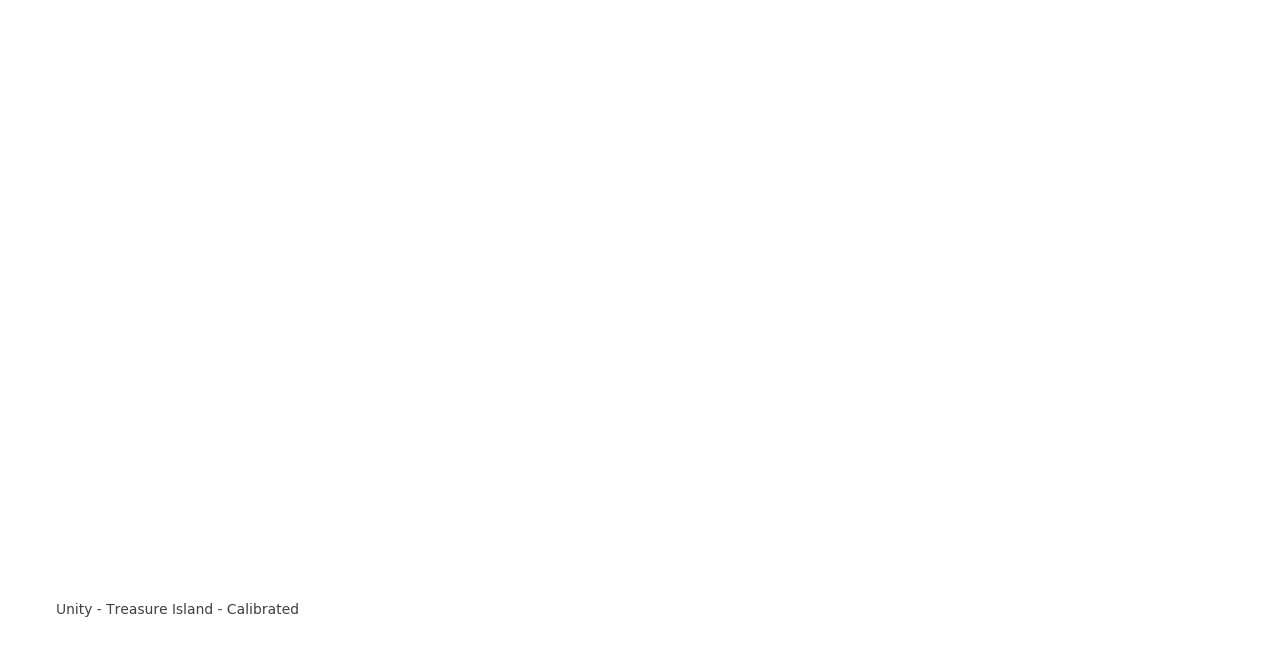

In [3]:
HDRI_IMAGE = colour.read_image(
    os.path.join(RESOURCES_DIRECTORY, 
                 'Unity_Treasure_Island_White_Balanced.exr'))

plot_image(colour.cctf_encoding(HDRI_IMAGE), 
           {'text': 'Unity - Treasure Island'})

HDRI_IMAGE_C = absolute_luminance_calibration_Lagarde2016(HDRI_IMAGE, 51000)

plot_image(colour.cctf_encoding(HDRI_IMAGE_C), 
           {'text': 'Unity - Treasure Island - Calibrated', 'color': 'black'});

## Upper Hemisphere Illuminance Weights

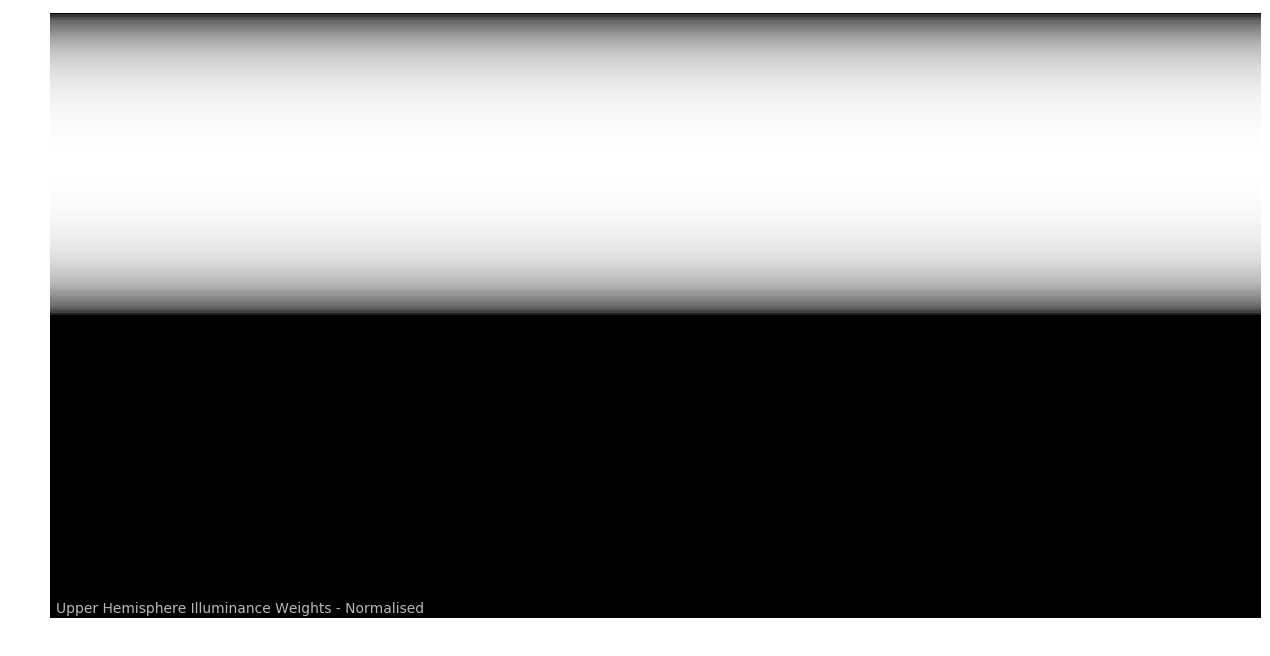

In [4]:
plot_image(colour.cctf_encoding(
            colour.utilities.normalise_maximum(
                    upper_hemisphere_illuminance_weights_Lagarde2016(256, 512))), 
           {'text': 'Upper Hemisphere Illuminance Weights - Normalised'});

## Photometric Exposure Conversion - Digital Still Camera (DSC) Exposure Model

After calibration to absolute luminance, the HDR image can be transformed to photometric exposure, i.e. focal plane exposure, in $lx.s$ according to the model of a typical Digital Still Camera (DSC). _Exposing_ the HDR image using the Saturation-Based Speed (SBS) method as given in the *ISO12232-2006* standard and typical DSC exposure controls is done as follows:

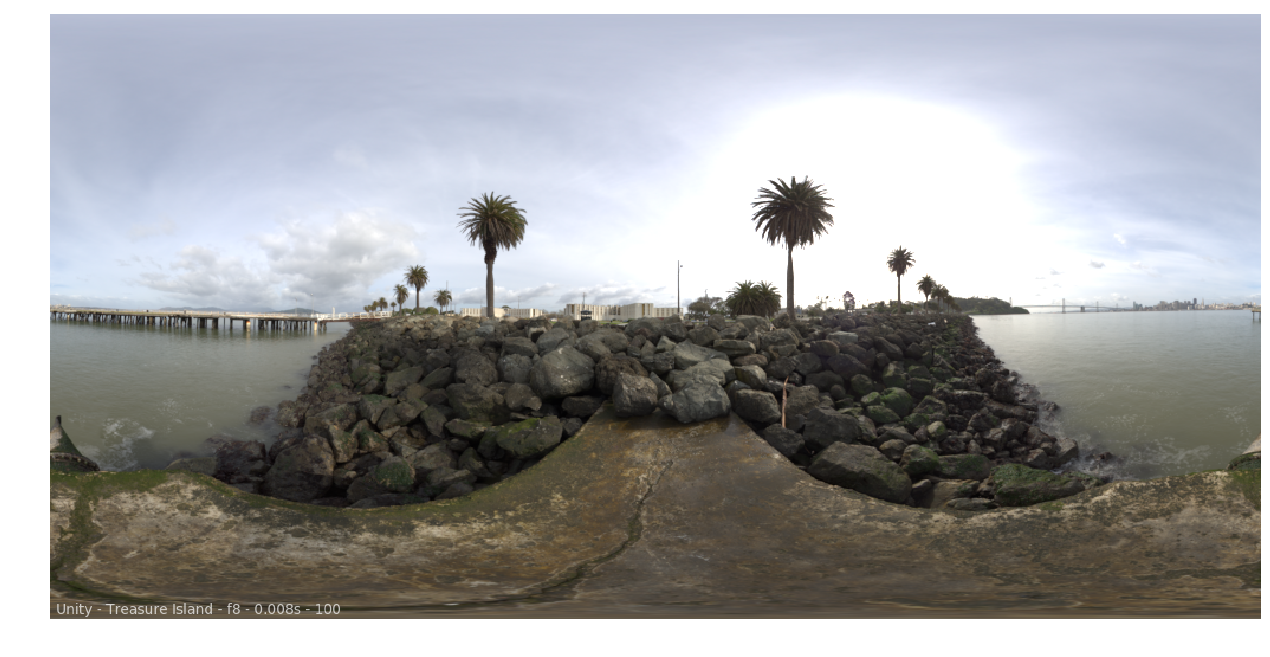

In [5]:
F_NUMBER = 8
EXPOSURE_TIME = 1 / 125
ISO = 100
# Assuming a 8mm focal length.
FOCAL_LENGTH = 8 / 1000
# Assuming a 50m object distance.
IMAGE_DISTANCE = 1 / (-1 / 50 + 1 / FOCAL_LENGTH)
# Flare in lx.s.
FLARE = 0

HDRI_IMAGE_E = saturation_based_speed_focal_plane_exposure(
    HDRI_IMAGE_C,
    F_NUMBER,
    EXPOSURE_TIME,
    ISO,
    FOCAL_LENGTH,
    IMAGE_DISTANCE,
    FLARE)

plot_image(colour.cctf_encoding(HDRI_IMAGE_E), 
           {'text': 'Unity - Treasure Island - f{0} - {1}s - {2}'.format(
               F_NUMBER, EXPOSURE_TIME, ISO)});

Alternatively, the HDR image can be exposed using Lagarde and de Rousiers (2014) formulation derived from the *ISO12232-2006* standard:

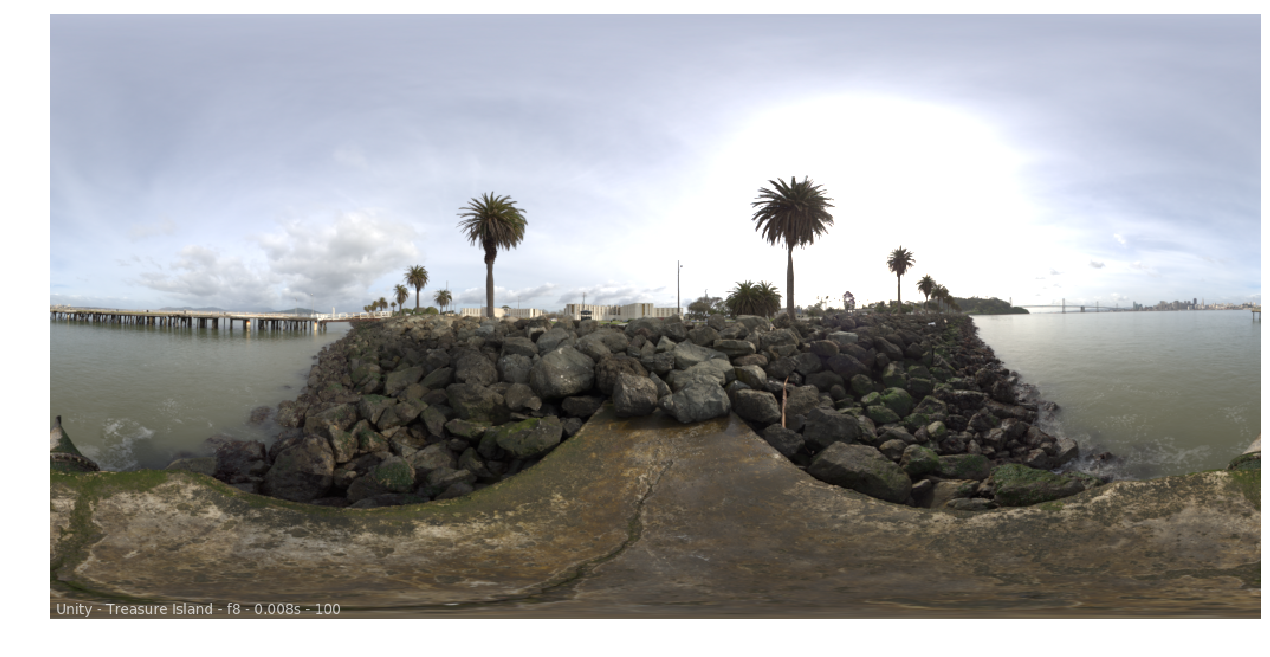

In [6]:
EV100 = exposure_value_100(F_NUMBER, EXPOSURE_TIME, ISO)
H_SF = photometric_exposure_scale_factor_Lagarde2014(EV100)

HDRI_IMAGE_E = HDRI_IMAGE_C * H_SF

plot_image(colour.cctf_encoding(HDRI_IMAGE_E), 
           {'text': 'Unity - Treasure Island - f{0} - {1}s - {2}'.format(
               F_NUMBER, EXPOSURE_TIME, ISO)});